
Statistical Data Analysis project work

Load the data from the file bikes.data. Check that the data is correctly loaded.

Raw Data loaded Below 

In [23]:
import numpy as np
import matplotlib as mat
import pandas as pd
import scipy.stats as Scipy_stats
from numpy import NaN
import seaborn as sns
df = pd.read_csv('C:/Users/vasis/OneDrive/Desktop/Statistical_data_analytics/bikes.csv')
df_clean = df
print(df) 
df.describe()

      ticket  cost  month  location_from  location_to  duration  distance  \
0     season  0.00      7       TEATTERI     TEATTERI         3         0   
1     single  0.35      7           TORI     TEATTERI       416       820   
2     season  0.00      8           TORI       SATAMA       721      1230   
3     single  0.25      5       TEATTERI         TORI       261       720   
4     season  0.00      5       TEATTERI         TORI       382       710   
...      ...   ...    ...            ...          ...       ...       ...   
1995  single  0.40      8            KYS         TORI       420      1940   
1996  single  0.65      7  VÄINÖLÄNNIEMI       SATAMA       720      1020   
1997  single  0.15      9           TORI     TEATTERI       172       730   
1998  season  0.00      7     SNELLMANIA  MICROTEKNIA       211       450   
1999  single  1.00      5       TEATTERI         TORI      1166       680   

      assistance  energy_used  energy_collected  
0              0         

,cost,month,duration,distance,assistance,energy_used,energy_collected
count,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.22345,6.978000,539.975500,1721.93000,0.816500,11.761300,4.389300
std,0.47570,1.646776,593.810888,2017.79918,0.387173,15.573439,5.990604
min,0.00000,4.000000,1.000000,-3320.00000,0.000000,0.000000,0.000000
25%,0.00000,6.000000,144.750000,40.00000,1.000000,0.000000,0.000000
50%,0.00000,7.000000,400.000000,1130.00000,1.000000,7.100000,2.400000
75%,0.30000,8.000000,736.750000,2572.50000,1.000000,18.500000,6.900000
max,6.95000,10.000000,8292.000000,19740.00000,1.000000,184.300000,91.500000


Using the data documentation, describe the properties of each variable (categorical or quantitative; scale of measurement

Data set has group of Categorical and Numerical Variables 
1) Ticket is Categorical and nominal Variable since it has 3 types viz, Single Season and savonia
2) Cost is a Numerical Variable 
3) Month is a Categorical, Discrete and ordinal variable with some set of months repeating everywhere.
4) Location_from is a Categorical and nominal variable with 10 places
5) Location_to is a Categorical and nominal variable with 10 places
6) Duration is a Numerical and ratio variable
7) Distance is a Numerical and ratio variable 
8) Assistance is a Categorical Variable with two statuses 1 or 0.
9) energy_used is a Numerical variable  and a continous avriable
10) energy_collected is a Numerical and a continous variable 

From the above raw data, It is observed that there are some Negative values in Distnace column which is pratically nit possible so we will avoid those values by modifying them to NaN and then removing all those rows for better data analysis.
Dropping the negative values from the Distance column.

Using the results of the previous steps, identify and process invalid values, if any.

Calculate basic statistics for each variable.

In [24]:

df_clean[df_clean["distance"]<0] = NaN
df_clean.dropna(inplace = True)
df_clean.describe()

,cost,month,duration,distance,assistance,energy_used,energy_collected
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,0.223630,6.979387,541.543992,1733.981900,0.815485,11.825239,4.413424
std,0.476376,1.644477,594.425033,2015.518973,0.388001,15.592584,5.998334
min,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,146.000000,50.000000,1.000000,0.000000,0.000000
50%,0.000000,7.000000,403.000000,1130.000000,1.000000,7.200000,2.400000
75%,0.300000,8.000000,739.000000,2580.000000,1.000000,18.500000,6.900000
max,6.950000,10.000000,8292.000000,19740.000000,1.000000,184.300000,91.500000


From the above Table we can see the Mean, Standard Deviation and the count of the data set and distribution at diffrent percentiles for different Variables..

In [25]:
print("cost:",Scipy_stats.shapiro(df_clean["cost"]))
print("duration:",Scipy_stats.shapiro(df_clean["duration"]))
print("energy used:",Scipy_stats.shapiro(df_clean["energy_used"]))
print("energy collected:",Scipy_stats.shapiro(df_clean["energy_collected"]))
print("distance:",Scipy_stats.shapiro(df_clean["distance"]))


cost: ShapiroResult(statistic=0.5075654983520508, pvalue=0.0)
duration: ShapiroResult(statistic=0.7284510135650635, pvalue=0.0)
energy used: ShapiroResult(statistic=0.7395671010017395, pvalue=0.0)
energy collected: ShapiroResult(statistic=0.6993032693862915, pvalue=0.0)
distance: ShapiroResult(statistic=0.7761672735214233, pvalue=0.0)


From the above P- Values we can see that none of the given Variables are Normally Distributed..

Visualise the distribution of each variable.

<AxesSubplot:ylabel='Density'>

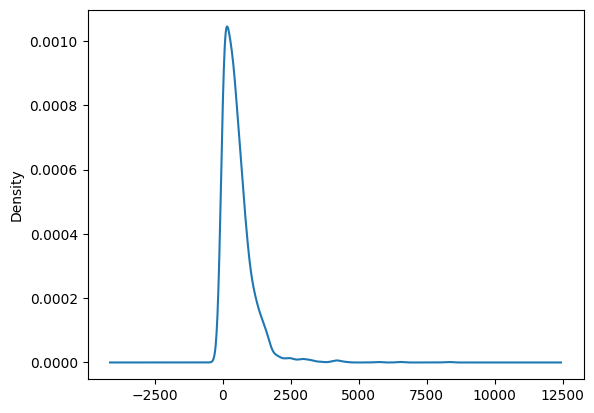

In [26]:
df_clean.duration.plot(kind= 'density')

<AxesSubplot:ylabel='Density'>

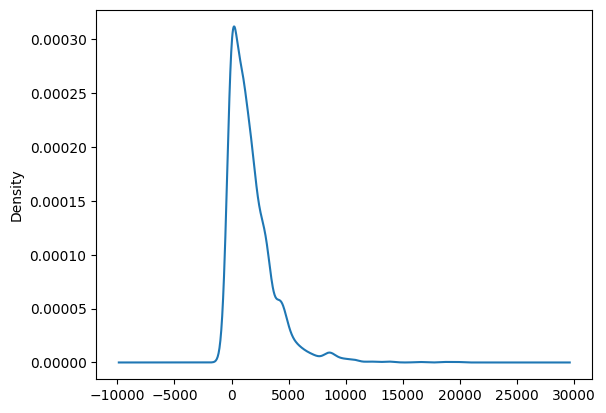

In [27]:

df_clean.distance.plot(kind= 'density')

<AxesSubplot:ylabel='Density'>

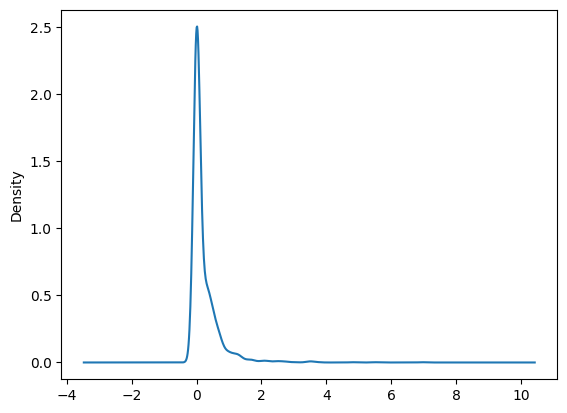

In [28]:
df_clean.cost.plot(kind= 'density')


<AxesSubplot:ylabel='Density'>

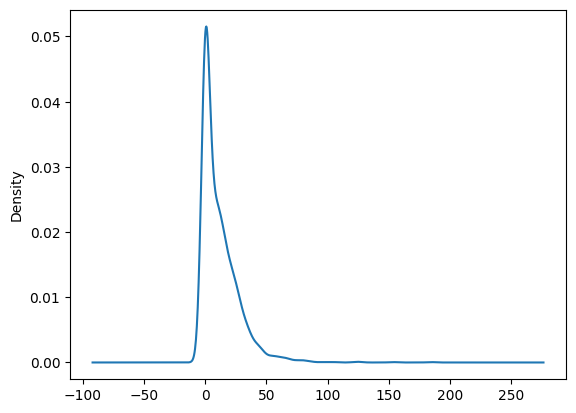

In [29]:
# sns.kdeplot(data = df_clean, x = 'energy_used')
df_clean.energy_used.plot(kind= 'density')

<AxesSubplot:ylabel='Density'>

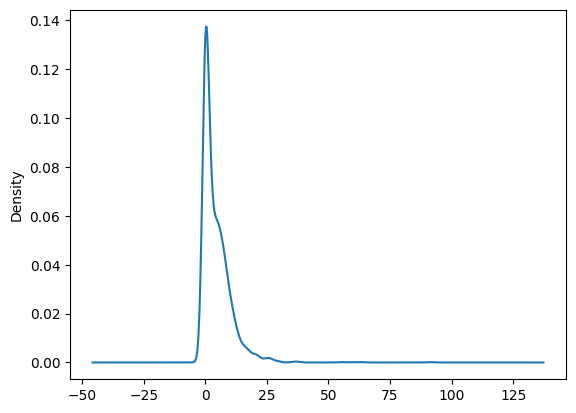

In [30]:
df_clean.energy_collected.plot(kind= 'density')


Calculate the total distance travelled, the total time travelled, and the total amount of fees paid per ticket type.

In [31]:
df_groupby_sum = df_clean.groupby("ticket").sum()
print(df_groupby_sum.distance,df_groupby_sum.duration,df_groupby_sum.cost)

ticket
savonia     408580.0
season     1419140.0
single     1621170.0
Name: distance, dtype: float64 ticket
savonia    122548.0
season     459241.0
single     495342.0
Name: duration, dtype: float64 ticket
savonia      0.0
season       8.0
single     436.8
Name: cost, dtype: float64


Thus using groupby() on Ticket and then adding those all values using sum() we can get the total distance travelled, the total time travelled, and the total amount of fees paid per ticket type is calculated and their respective values is as shown above..

Calculate the mean distance travelled, the mean energy consumed, and the mean energy collected per status of assistance.

In [32]:
df_groupby_mean = df_clean.groupby("assistance").mean()
print(df_groupby_mean.distance,df_groupby_mean.duration,df_groupby_mean.cost)

assistance
0.0     873.542234
1.0    1928.668311
Name: distance, dtype: float64 assistance
0.0    350.247956
1.0    584.827374
Name: duration, dtype: float64 assistance
0.0    0.181335
1.0    0.233200
Name: cost, dtype: float64


Hence, using groupby() on assistance and then taking the mean() of those values we can get the mean distance travelled, the mean energy consumed, and the mean energy collected per status of assistance and there respective values is as shown above..

Find the three most popular locations per ticket type in terms of the number of trips that either started or ended at the location.

In [33]:

df_check_from = df_clean[df_clean['ticket'] =='season']['location_from'].value_counts()
df_check_to = df_clean[df_clean['ticket'] =='season']['location_to'].value_counts()
print("season ticket highest to lowest is:")
print((df_check_from+df_check_to).sort_values(ascending=False))

df_check_from = df_clean[df_clean['ticket'] =='single']['location_from'].value_counts()
df_check_to = df_clean[df_clean['ticket'] =='single']['location_to'].value_counts()
print("single ticket highest to lowest is:")
print((df_check_from+df_check_to).sort_values(ascending=False))

df_check_from = df_clean[df_clean['ticket'] =='savonia']['location_from'].value_counts()
df_check_to = df_clean[df_clean['ticket'] =='savonia']['location_to'].value_counts()
print("savonia ticket highest to lowest is:")
print((df_check_from+df_check_to).sort_values(ascending=False))

season ticket highest to lowest is:
TORI             629
SATAMA           288
VÄINÖLÄNNIEMI    162
TEATTERI         147
MICROTEKNIA      133
KYS              124
RYPYSUO           87
SNELLMANIA        86
PETONEN           65
UIMAHALLI         57
dtype: int64
single ticket highest to lowest is:
TORI             669
SATAMA           314
TEATTERI         157
VÄINÖLÄNNIEMI    154
MICROTEKNIA      120
KYS               97
SNELLMANIA        92
RYPYSUO           80
PETONEN           42
UIMAHALLI         41
dtype: int64
savonia ticket highest to lowest is:
MICROTEKNIA      140
TORI             127
SNELLMANIA        44
SATAMA            42
TEATTERI          26
KYS               22
RYPYSUO           13
UIMAHALLI         10
VÄINÖLÄNNIEMI      6
PETONEN            4
dtype: int64


First we will split the data according the ticket type and then take the value_counts() of each location from both location_from and location_to and sum those values to see the top3 popular locations based on ticket type.

Hence, the 3 popular locations for season ticket is TORI,
SATAMA,
VÄINÖLÄNNIEMI.

The 3 popular locations for single ticket is TORI,
SATAMA,
TEATTERI.

The 3 popular locations for savonia ticket is MICROTEKNIA,
TORI,
SNELLMANIA


Visualise monthly rental activity per ticket type in terms of total distance travelled.

    month   ticket  distance
0     4.0   season   17880.0
1     4.0   single   53600.0
2     5.0   season  234550.0
3     5.0   single  282760.0
4     6.0   season  378160.0
5     6.0   single  492620.0
6     7.0   season  336250.0
7     7.0   single  330950.0
8     8.0   season  238860.0
9     8.0   single  179620.0
10    9.0  savonia  217360.0
11    9.0   season  141510.0
12    9.0   single  191480.0
13   10.0  savonia  191220.0
14   10.0   season   71930.0
15   10.0   single   90140.0


<AxesSubplot:xlabel='month', ylabel='distance'>

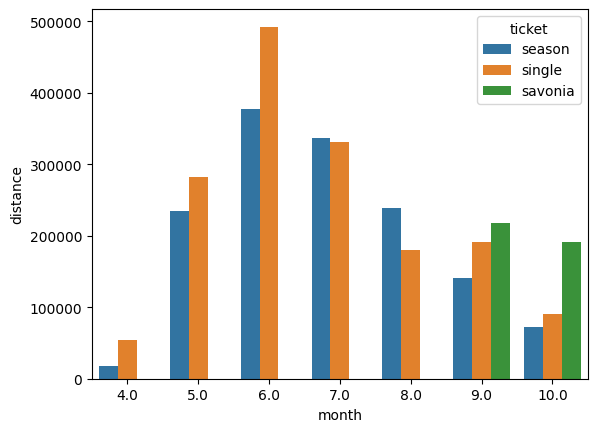

In [34]:
df_monthly_activity= df_clean.groupby(["month","ticket"])["distance"].sum().reset_index()
print(df_monthly_activity)
sns.barplot(data=df_monthly_activity, x="month", y='distance', hue="ticket")

To obtain the monthly activity per ticket type in terms of total distance travelled from the data we will need to groupby() month and second group by metric as tikcet type.

And then on the distance column use the sum() to get the total distance. then using resest_index(), assign the total distance into distance and now use sns bar plot visualise the data.

The above bar plot shows the Monthly rental activity per ticket type in terms of total distance travelled. where total distance is on Y- axis and Months and ticket type on X- axis..

Visualise the distribution of net energy gain, which is defined as the difference between the energy collected and consumed during a trip.

<AxesSubplot:ylabel='Density'>

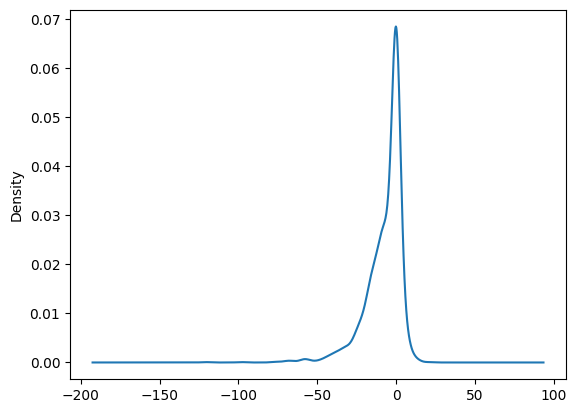

In [35]:
df_distribution = df_clean["energy_collected"]-df_clean["energy_used"]
df_distribution.plot(kind= 'density')

Net Energy Gain is nothing but the difference between Energy collected and Energy consumed during a trip..
so it can be calculated and visualised by taking those two Variables each data point and subtracting energy consumed value from the energy collected value..
and later put the distribution on plot to visulaize the net energy gain..


Visualise the pairwise relationships between the quantitative variables.

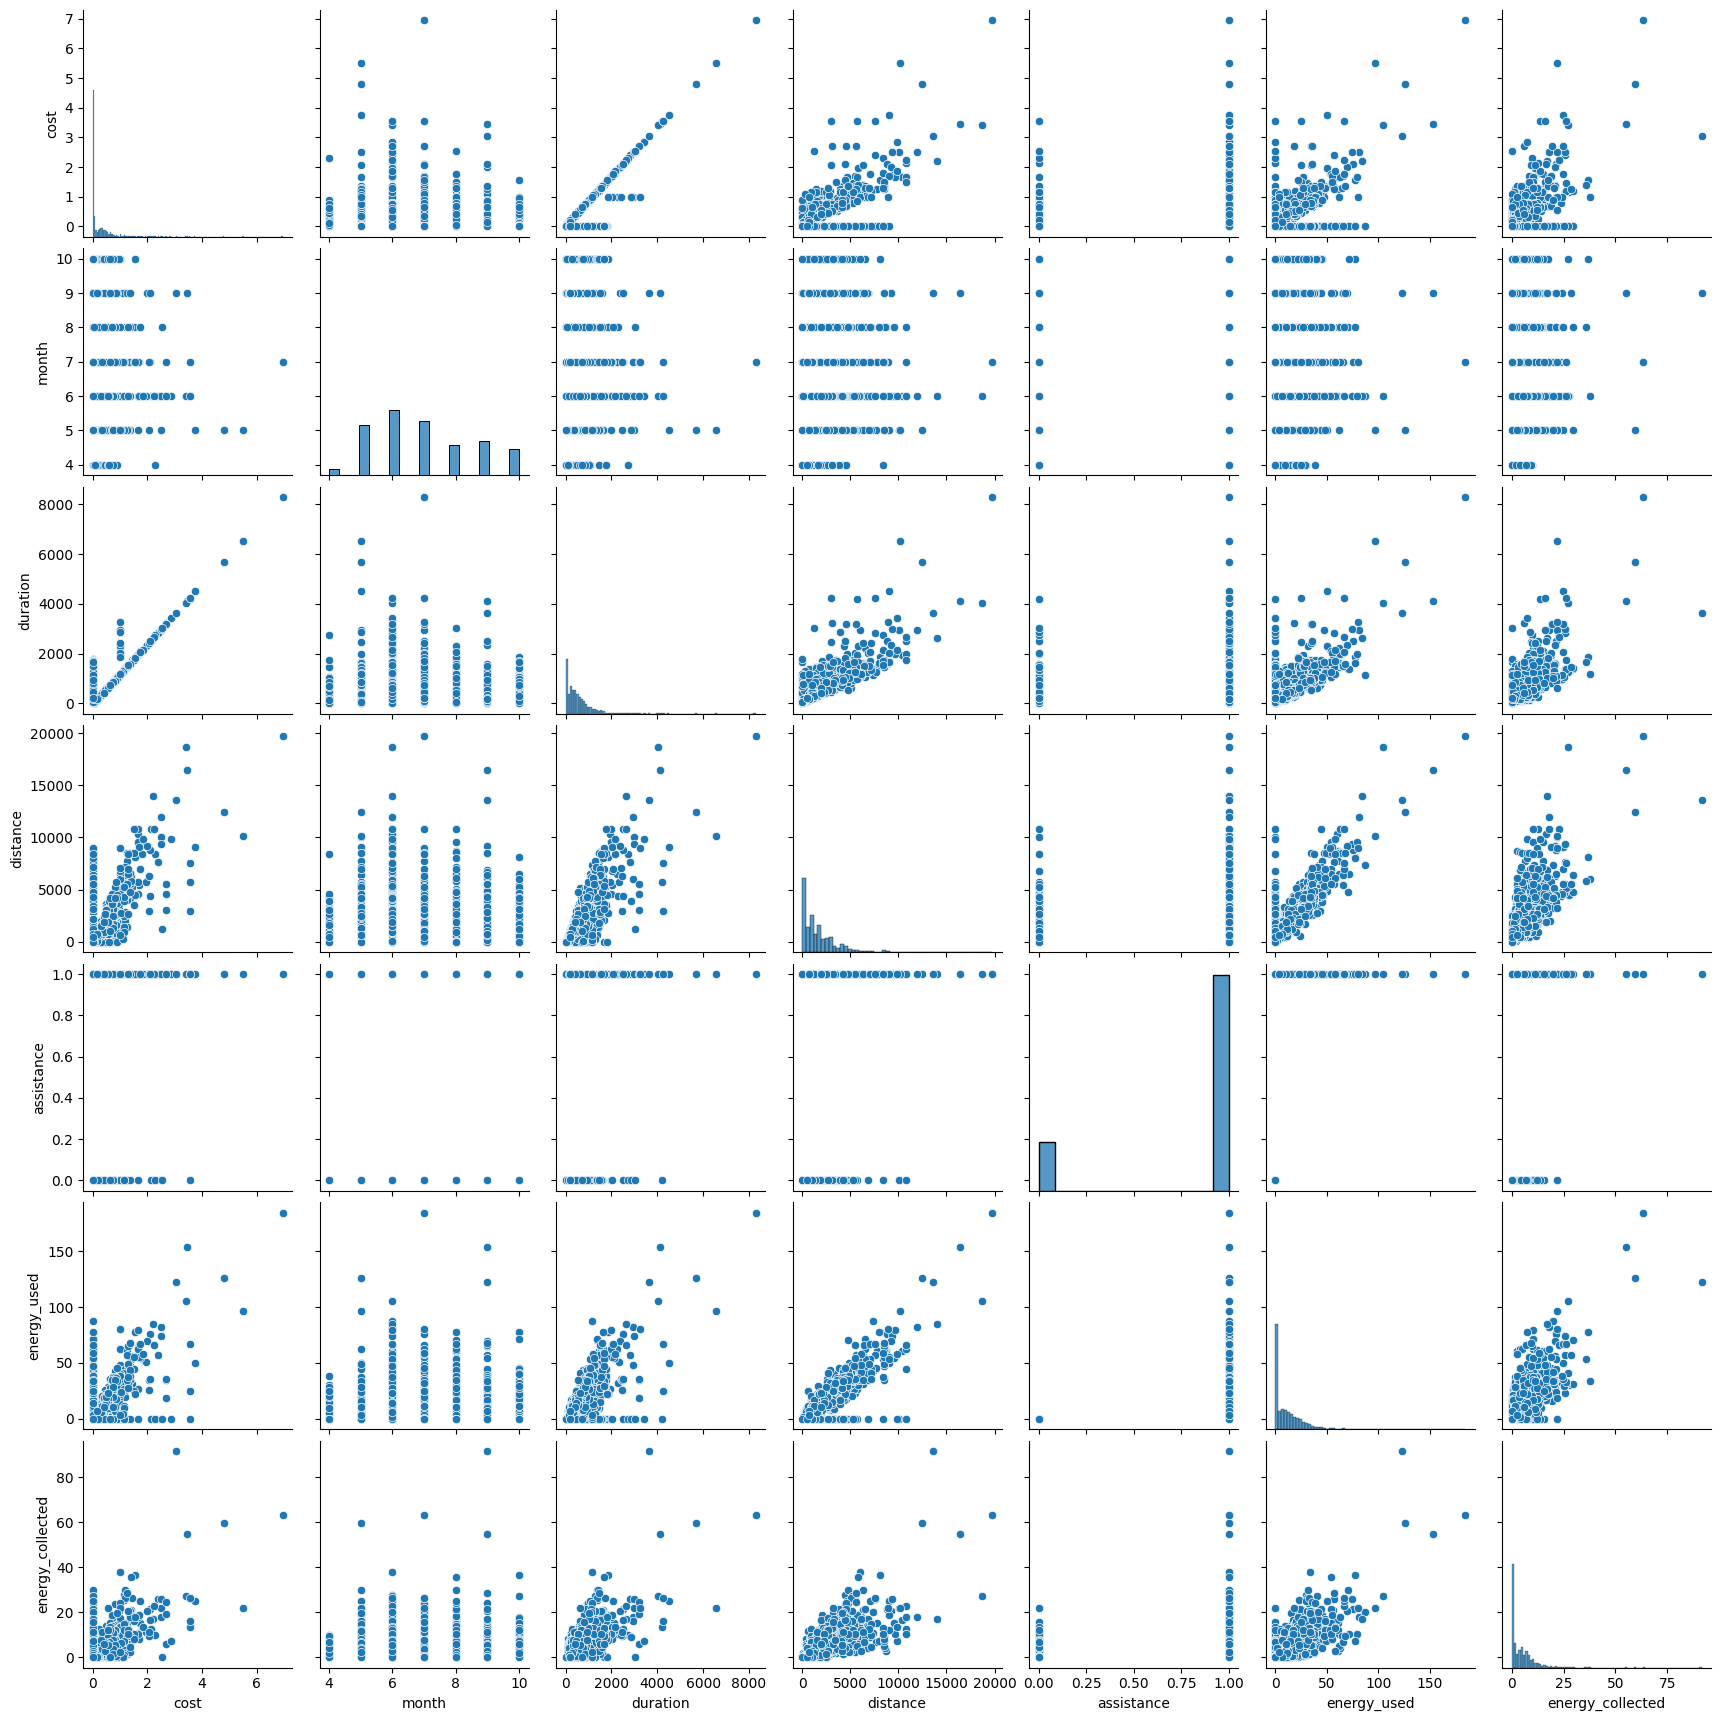

In [36]:
sns.pairplot(df_clean)

In [37]:
print("Hypothesis testing")
print("Explain what the p-value of a statistical test means and how it can be used to make conclusions? \n Ans: Basically P-Value is nothing but the probability of some analysis whether it is significant or insignificant..i.e., to accept the null hypothesis testing or reject it if the P-value is less than 0.05. Mostly the P-value is expressed in between 0 to 1. ")

Hypothesis testing
Explain what the p-value of a statistical test means and how it can be used to make conclusions? 
 Ans: Basically P-Value is nothing but the probability of some analysis whether it is significant or insignificant..i.e., to accept the null hypothesis testing or reject it if the P-value is less than 0.05. Mostly the P-value is expressed in between 0 to 1. 


For each of the questions below, justify your choice of test.

Here None of the variables are Normally distributed.. so only tests which assumes the variables that are non-rormal ditributed can be applied..  

Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type? ----- Mann Whitneyu test

Is there statistical evidence to claim that the single and savonia ticket types differ with respect to how often the electric assistance is used?----- Chi-squared test

Is there statistical evidence to claim that the travel distances tend to be shorter or longer during one month than during the others?---- kruskal wallis test.

Is there statistical evidence to claim that the distance travelled correlates with the energy consumed when the electric assistance is enabled?----spearman correlation

Is there statistical evidence to claim that the savonia and season ticket types differ with respect to how often the trip ends where it started?----Chi-squared test

Is there statistical evidence to claim that the travel time correlates with the average speed at which the trip is made?----spearman correlation


Is there statistical evidence to claim that the travel times tend to be shorter or longer for the single than for the season ticket type?

In [38]:
print(df_clean.groupby("ticket").mean())
df_single = df_clean[df_clean['ticket']=="single"]["duration"]
df_season = df_clean[df_clean['ticket']=="season"]["duration"]
print(df_single,"\n",df_season)
print(Scipy_stats.shapiro(df_single).pvalue)
print(Scipy_stats.shapiro(df_season).pvalue)
print("P-value of the bivariate analysis is:", Scipy_stats.mannwhitneyu(df_single, df_season).pvalue )
# Scipy_stats.mannwhitneyu(df_single, df_season).pvalue 

             cost     month    duration     distance  assistance  energy_used  \
ticket                                                                          
savonia  0.000000  9.502304  564.737327  1882.857143    0.958525    14.226267   
season   0.008999  6.716535  516.581552  1596.332958    0.812148    11.390776   
single   0.494677  6.624009  560.976217  1835.979615    0.783692    11.672593   

         energy_collected  
ticket                     
savonia          5.488479  
season           3.918560  
single           4.647452  
1        416.0
3        261.0
14      1260.0
16       160.0
17       453.0
         ...  
1994     198.0
1995     420.0
1996     720.0
1997     172.0
1999    1166.0
Name: duration, Length: 883, dtype: float64 
 0         3.0
2       721.0
4       382.0
5       960.0
6       589.0
        ...  
1986    454.0
1990     35.0
1991    953.0
1992    159.0
1998    211.0
Name: duration, Length: 889, dtype: float64
1.6262951496522027e-39
5.591184292993611e-25


From data Groupby Ticket and getting the mean of duration of single and season we can see that both the values are almost similar not much of a difference is noticed.. 

Technically, from the Mannwhitney u test, the p value is 0.335 which is more than 0.05.

so it is evident that both are similar and there is not much of any difference between the single and season over the travel duration.. 

Is there statistical evidence to claim that the single and savonia ticket types differ with respect to how often the electric assistance is used?

In [45]:
# Is there statistical evidence to claim that the single and savonia ticket types differ with respect to how often the electric assistance is used?
df_assistance_savonia=df_clean[df_clean["ticket"]=="savonia"]
df_assistance_single=df_clean[df_clean["ticket"]=="single"]
print(df_assistance_savonia)
print(df_assistance_single)
print(df_assistance_savonia[df_assistance_savonia["assistance"]==1.0].shape)
print(df_assistance_single[df_assistance_single["assistance"]==1.0].shape)
df_atssista = [[208, 9],[692, 191]]

print('p-value for the chi-squared test:', round(Scipy_stats.chi2_contingency(df_atssista)[1],11))

# df_assist_1= df_assistance_savonia[df_assistance_savonia["assistance"]==1]
# df_assist_1 = df_assistance_savonia[df_assistance_savonia["assistance"]==1]
# print(df_assist_1)



       ticket  cost  month location_from  location_to  duration  distance  \
13    savonia   0.0    9.0    SNELLMANIA   SNELLMANIA      64.0       0.0   
15    savonia   0.0    9.0   MICROTEKNIA  MICROTEKNIA      61.0       0.0   
18    savonia   0.0   10.0     UIMAHALLI         TORI     300.0     930.0   
20    savonia   0.0   10.0           KYS         TORI     566.0    1870.0   
23    savonia   0.0   10.0    SNELLMANIA   SNELLMANIA      90.0       0.0   
...       ...   ...    ...           ...          ...       ...       ...   
1969  savonia   0.0    9.0      TEATTERI         TORI     185.0     710.0   
1971  savonia   0.0    9.0   MICROTEKNIA   SNELLMANIA     161.0     460.0   
1975  savonia   0.0   10.0          TORI         TORI    1666.0    3180.0   
1977  savonia   0.0    9.0           KYS  MICROTEKNIA     342.0    1450.0   
1989  savonia   0.0    9.0          TORI         TORI    1132.0     130.0   

      assistance  energy_used  energy_collected  average_speed  
13        

Data is split based on ticket type and then checking data where electrical assistance is used in both the ticket types.

We see that 208 rows in savonia have assistance as 1.0 and 9 rows as 0.0
similarly 692 rows in singles as 1.0 and 191 rows as 0.0

Then create a data frame using these 4 values to use them in chi-square test.

Thus, using chi-square contingency test we get the p value as 3.99e-09 which is less than 0.05 we conclude that the single and savonia ticket types differ with respect to how often the electric assistance is used.

Is there statistical evidence to claim that the travel distances tend to be shorter or longer during one month than during the others?

In [40]:
#Is there statistical evidence to claim that the travel distances tend to be shorter or longer during one month than during the others?
print(df_clean.groupby("month")['dist ance'].mean().sort_values(ascending=False))
month_4 =df_clean[df_clean['month']==4.0]['distance']
month_5 =df_clean[df_clean['month']==5.0]['distance']
month_6 =df_clean[df_clean['month']==6.0]['distance']
month_7 =df_clean[df_clean['month']==7.0]['distance']
month_8 =df_clean[df_clean['month']==8.0]['distance']
month_9 =df_clean[df_clean['month']==9.0]['distance']
month_10 =df_clean[df_clean['month']==10.0]['distance']
print("p-value of the kruskal-wallis test is:", Scipy_stats.kruskal(month_4, month_5, month_6,month_7,month_8,month_9,month_10).pvalue)


month
9.0     2149.804688
8.0     1843.524229
10.0    1811.743590
6.0     1784.385246
4.0     1662.325581
7.0     1643.349754
5.0     1383.181818
Name: distance, dtype: float64
p-value of the kruskal-wallis test is: 2.2320188251501713e-09


So from the Table we see that in the 9th Month the mean is 2149 meters and lowest is in 5th month with 1383 so from the both the values there is a huge diffrence in distance travellend in different months.
and Besides statistically the Kruskal wallis test also shows a p value 2.2320188251501713e-09 which is very less than 0.05 is also a sign to prove that distances tend to be shorter or longer during one month than during the others.

Is there statistical evidence to claim that the distance travelled correlates with the energy consumed when the electric assistance is enabled?

 Correlation and p value are: SpearmanrResult(correlation=0.9467278315938991, pvalue=0.0)


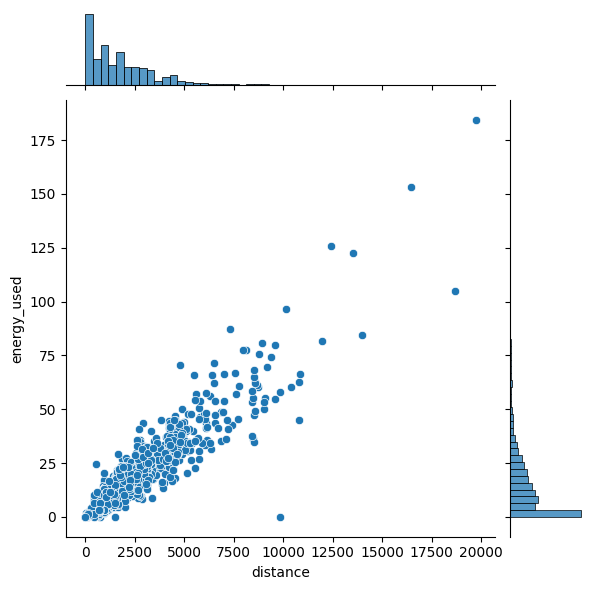

In [41]:
df_enabled = df_clean[df_clean["assistance"]==1.0]
# print(df_enabled)
print(" Correlation and p value are:",Scipy_stats.spearmanr(df_enabled.distance,df_enabled.energy_used))
sns.jointplot(x='distance', y='energy_used', data=df_enabled, alpha=1)

From the data set selecting the rows that are only having electric assistance as 1.0..

Then apply the spearman rank correlation since both the variables are non normal distributed.

From the above SpearmanrResult we find that both distance travelled and energy consumed are Highly correlated since the correlation value is 0.946.

Even the plot shpws that data points are highly correlated except a very few..

Is there statistical evidence to claim that the savonia and season ticket types differ with respect to how often the trip ends where it started?

In [42]:
#Is there statistical evidence to claim that the savonia and season ticket types differ with respect to how often the trip ends where it started?
df_match = df_clean[(df_clean["ticket"]=="season") |(df_clean["ticket"]=="savonia") ]
df_match_1= df_match[df_match["location_from"]==df_match["location_to"]]
print(df_match_1[df_match_1["ticket"]=="season"]["location_from"].value_counts())
print(df_match_1[df_match_1["ticket"]=="savonia"]["location_from"].value_counts())
df_testing = [[152,57,27,26,23,22,20,15,14,7],[30,6,2,0,25,0,2,7,3,0]]
print(df_testing)
print('p-value for the chi-squared test:', round(Scipy_stats.chi2_contingency(df_testing)[1],11)) 
# Scipy_stats.mannwhitneyu(df_match_1[df_match_1["ticket"]=="season"][],df_match_1[df_match_1["ticket"]=="savonia"]).pvalue

TORI             152
SATAMA            57
PETONEN           27
TEATTERI          26
MICROTEKNIA       23
VÄINÖLÄNNIEMI     22
KYS               20
SNELLMANIA        15
RYPYSUO           14
UIMAHALLI          7
Name: location_from, dtype: int64
TORI           30
MICROTEKNIA    25
SNELLMANIA      7
SATAMA          6
RYPYSUO         3
KYS             2
PETONEN         2
Name: location_from, dtype: int64
[[152, 57, 27, 26, 23, 22, 20, 15, 14, 7], [30, 6, 2, 0, 25, 0, 2, 7, 3, 0]]
p-value for the chi-squared test: 6e-10


We split the data by ticket type and see the condition where location_from and location_to are matching then using value_counts() we get the counts of each matching locations..

then we create a new data frame with those values from both season and savonia for applying chi square contingency test
 
So thus, from the above values we can see that Season has 373 out of 889 or 40.8 percent and Savonia has 75 out of 217 or 34.5 percent of trips start and end at the same location! but the locations differ significantly..and Thus from the Chi-squared test we get that p value is 6e-10 which is very less and shows a statistical evidence that savonia and season ticket types differ with respect to how often the trip ends where it started

Is there statistical evidence to claim that the travel time correlates with the average speed at which the trip is made?

      ticket  cost  month  location_from  location_to  duration  distance  \
0     season  0.00    7.0       TEATTERI     TEATTERI       3.0       0.0   
1     single  0.35    7.0           TORI     TEATTERI     416.0     820.0   
2     season  0.00    8.0           TORI       SATAMA     721.0    1230.0   
3     single  0.25    5.0       TEATTERI         TORI     261.0     720.0   
4     season  0.00    5.0       TEATTERI         TORI     382.0     710.0   
...      ...   ...    ...            ...          ...       ...       ...   
1995  single  0.40    8.0            KYS         TORI     420.0    1940.0   
1996  single  0.65    7.0  VÄINÖLÄNNIEMI       SATAMA     720.0    1020.0   
1997  single  0.15    9.0           TORI     TEATTERI     172.0     730.0   
1998  season  0.00    7.0     SNELLMANIA  MICROTEKNIA     211.0     450.0   
1999  single  1.00    5.0       TEATTERI         TORI    1166.0     680.0   

      assistance  energy_used  energy_collected  average_speed  
0         

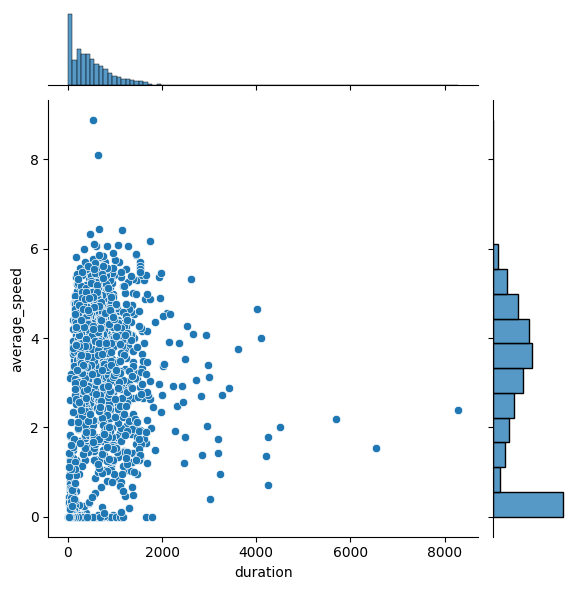

In [46]:
df_time_corr = df_clean
df_time_corr['average_speed'] = df_time_corr['distance']/df_time_corr['duration']
# print(df_time_corr)
print("Correlation and p value are:",Scipy_stats.spearmanr(df_time_corr.duration,df_time_corr.average_speed))
sns.jointplot(x='duration', y='average_speed', data=df_time_corr, alpha=1)

Average speed is calculated by dividing the distance with duration. and later it is assigned into a new dataframe.

Then apply the spearman rank correlation since both the variables are non normal distributed.

From the above SpearmanrResult we find that travel time correlates abit with duration since the correlation value is 0.509.

even the plot shows it that the values are not heavily correlated but some point shows the correlation.. 